# **Single Variable Linear Regression**

- 정의 : sample data를 가장  잘 설명할 수 있는 W, b를 찾는 기계학습 모델을 구현한다.
- f(x) : wx + b, ex) w = 0.2, b = 1
- loss_function : Mean Squared Error 1/n * sum((f(x) - y)^2)
- gradient 함수 : 중앙차분, loss_function(w+h) - loss_function(w-h) / (2*h)
- gradient_update : w = w - learning_rate * dE/dw

In [1]:
import numpy as np

In [2]:
x_data = np.array([1.0, 2.0, 3.0, 4.0, 5.0]).reshape(5,1)
y_data = np.array([2.0, 3.0, 4.0, 5.0, 6.0]).reshape(5,1)

In [3]:
import matplotlib.pyplot as plt

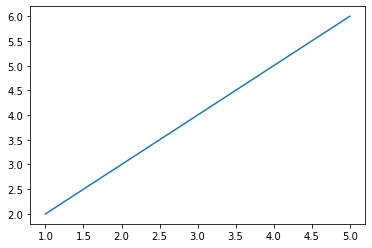

In [4]:
plt.plot(x_data, y_data)

In [5]:
weights = np.random.rand(1,1)
bias = np.random.rand(1)

In [6]:
print(weights, bias)

[[0.15993081]] [0.33535116]


In [7]:
def func1(x, weights, bias):
    return x*weights + bias

In [8]:
func1(x_data[0], weights, bias)

array([[0.49528197]])

In [9]:
func1(x_data, weights, bias)

array([[0.49528197],
       [0.65521278],
       [0.81514358],
       [0.97507439],
       [1.1350052 ]])

In [10]:
f = func1

In [11]:
def loss_function(f, weights, bias, input_data, target):
    f = f(input_data, weights, bias)

    MSE = (1/len(input_data)) * sum((f - target)**2)
    return MSE

In [12]:
loss = loss_function

In [13]:
def gradient_func(f, weights, bias, loss, input_data, target):
    h = 10e-5
    # if grad_name == 'weights':
    #     diff = (loss(f,weights+h, bias, input_data, target) - loss(f,weights+h, bias, input_data, target)) / (2*h)
    # else:
    #     diff = (loss(f,weights, bias+h, input_data, target) - loss(f,weights, bias+h, input_data, target)) / (2*h)

    w_forward = loss(f,weights+h, bias, input_data, target)
    w_backward = loss(f,weights-h, bias, input_data, target)
    grad_w = (w_forward - w_backward) / (2*h)

    b_forward = loss(f,weights, bias+h, input_data, target)
    b_backward = loss(f,weights, bias-h, input_data, target)
    grad_b = (b_forward - b_backward) / (2*h)

    return grad_w, grad_b

In [14]:
dw, db = gradient_func(f, weights, bias, loss, x_data, y_data)

In [15]:
def gradient_update(weights, bias, learning_rate, dw, db):
    w = weights - learning_rate * dw
    b = bias - learning_rate * db
    return w, b

In [16]:
gradient_update(weights, bias, 0.0001, dw, db)

(array([[0.16217775]]), array([0.33598813]))

In [17]:
f = func1
loss = loss_function

for i in range(10000):
    print("weights : ", weights, "bias : ", bias)
    grad_w, grad_b = gradient_func(f, weights, bias, loss, x_data, y_data)
    weights, bias = gradient_update(weights, bias, 0.0001, grad_w, grad_b)


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
weights :  [[1.09383157]] bias :  [0.66121171]
weights :  [[1.09382842]] bias :  [0.66122317]
weights :  [[1.09382526]] bias :  [0.66123463]
weights :  [[1.09382211]] bias :  [0.66124609]
weights :  [[1.09381895]] bias :  [0.66125755]
weights :  [[1.09381579]] bias :  [0.661269]
weights :  [[1.09381264]] bias :  [0.66128046]
weights :  [[1.09380948]] bias :  [0.66129192]
weights :  [[1.09380632]] bias :  [0.66130337]
weights :  [[1.09380317]] bias :  [0.66131483]
weights :  [[1.09380001]] bias :  [0.66132628]
weights :  [[1.09379686]] bias :  [0.66133774]
weights :  [[1.0937937]] bias :  [0.66134919]
weights :  [[1.09379055]] bias :  [0.66136065]
weights :  [[1.09378739]] bias :  [0.6613721]
weights :  [[1.09378423]] bias :  [0.66138355]
weights :  [[1.09378108]] bias :  [0.66139501]
weights :  [[1.09377792]] bias :  [0.66140646]
weights :  [[1.09377477]] bias :  [0.66141791]
weights :  [[1.09377161]] bias :  [0.66142936]
weights :  [[1.09376846]] bi